In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("datado2019WHO.csv")

In [5]:
df.rename(columns=df.iloc[0])
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [7]:
df.columns = ['Country', 'Year', 'Both','Male','Female']

In [9]:
df["Both_sex"] = df["Both"].str[0:4]
df["Both_sex"] = df["Both_sex"].astype(float)
df.head()

,Country,Year,Both,Male,Female,Both_sex
1,Afghanistan,2019,67.7 [33.4-121.2],71.3 [36.2-125.7],64.4 [30.9-117.2],67.7
2,Afghanistan,2018,67.7 [33.2-121.8],71.2 [36.0-126.0],64.4 [30.7-117.9],67.7
3,Afghanistan,2017,67.9 [32.9-123.2],71.6 [35.6-128.0],64.4 [30.4-118.7],67.9
4,Afghanistan,2016,68.8 [33.0-125.6],72.0 [35.5-129.7],65.8 [30.7-121.9],68.8
5,Afghanistan,2015,69.5 [33.2-127.8],72.7 [35.7-131.6],66.6 [30.9-124.3],69.5


In [23]:
df = df.sort_values(by = ['Country', 'Year'])

In [24]:
df.tail()

,Country,Year,Both,Male,Female,Both_sex
3645,Zimbabwe,2015,65.2 [33.2-116.1],72.5 [37.5-128.9],59.4 [29.8-106.2],65.2
3644,Zimbabwe,2016,64.5 [32.6-115.4],71.7 [36.8-128.1],58.9 [29.4-105.6],64.5
3643,Zimbabwe,2017,63.3 [32.1-113.1],70.6 [36.3-126.0],57.5 [28.8-103.0],63.3
3642,Zimbabwe,2018,63.1 [31.9-113.0],70.4 [36.1-125.8],57.3 [28.6-102.8],63.1
3641,Zimbabwe,2019,63.6 [32.1-113.8],70.7 [36.2-126.3],57.8 [28.8-103.6],63.6


In [26]:
df

,Country,Year,Both,Male,Female,Both_sex
20,Afghanistan,2000,72.0 [32.3-140.8],74.0 [34.6-140.6],69.9 [29.9-141.0],72.0
19,Afghanistan,2001,71.7 [32.5-138.7],73.7 [34.7-139.0],69.5 [30.1-138.5],71.7
18,Afghanistan,2002,72.0 [32.4-140.2],74.1 [34.6-140.8],69.9 [30.2-139.5],72.0
17,Afghanistan,2003,72.5 [32.4-141.6],74.6 [34.6-142.4],70.3 [30.2-140.8],72.5
16,Afghanistan,2004,72.9 [32.7-141.6],75.0 [34.9-142.4],70.7 [30.6-140.7],72.9
...,...,...,...,...,...,...
3645,Zimbabwe,2015,65.2 [33.2-116.1],72.5 [37.5-128.9],59.4 [29.8-106.2],65.2
3644,Zimbabwe,2016,64.5 [32.6-115.4],71.7 [36.8-128.1],58.9 [29.4-105.6],64.5
3643,Zimbabwe,2017,63.3 [32.1-113.1],70.6 [36.3-126.0],57.5 [28.8-103.0],63.3
3642,Zimbabwe,2018,63.1 [31.9-113.0],70.4 [36.1-125.8],57.3 [28.6-102.8],63.1


In [27]:
slo = df[df.Country == "Slovenia"]

In [281]:
y = slo[["Year", "Both_sex"]].copy()

In [257]:
new_row = {'Year':'2020-01-01', 'Both_sex':"24.5"}
y = y.append(new_row, ignore_index=True)

In [282]:
y = y.astype({"Year": "datetime64[ns]", "Both_sex": float})
#y.dtypes
y.tail()

,Year,Both_sex
2965,2015-01-01,25.9
2964,2016-01-01,25.2
2963,2017-01-01,24.9
2962,2018-01-01,24.6
2961,2019-01-01,24.7


In [283]:
y = y.set_index('Year')
y.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [284]:
y['2017':]


,Both_sex
Year,
2017-01-01,24.9
2018-01-01,24.6
2019-01-01,24.7


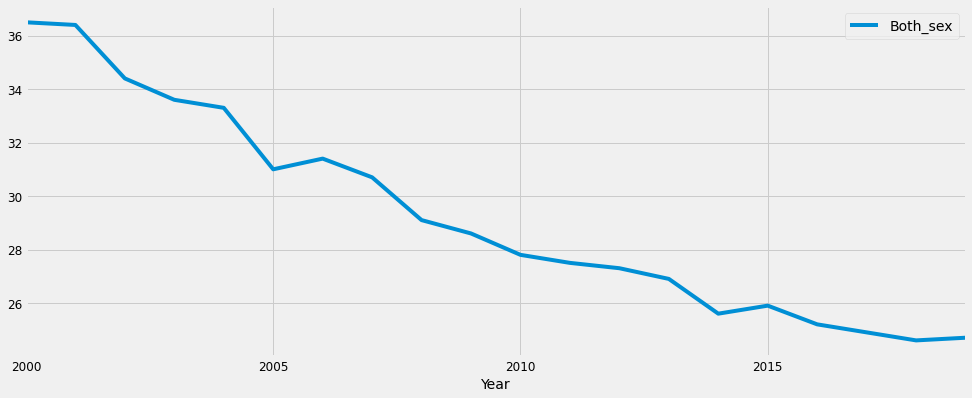

In [285]:
y.plot(figsize=(15, 6))
plt.show()

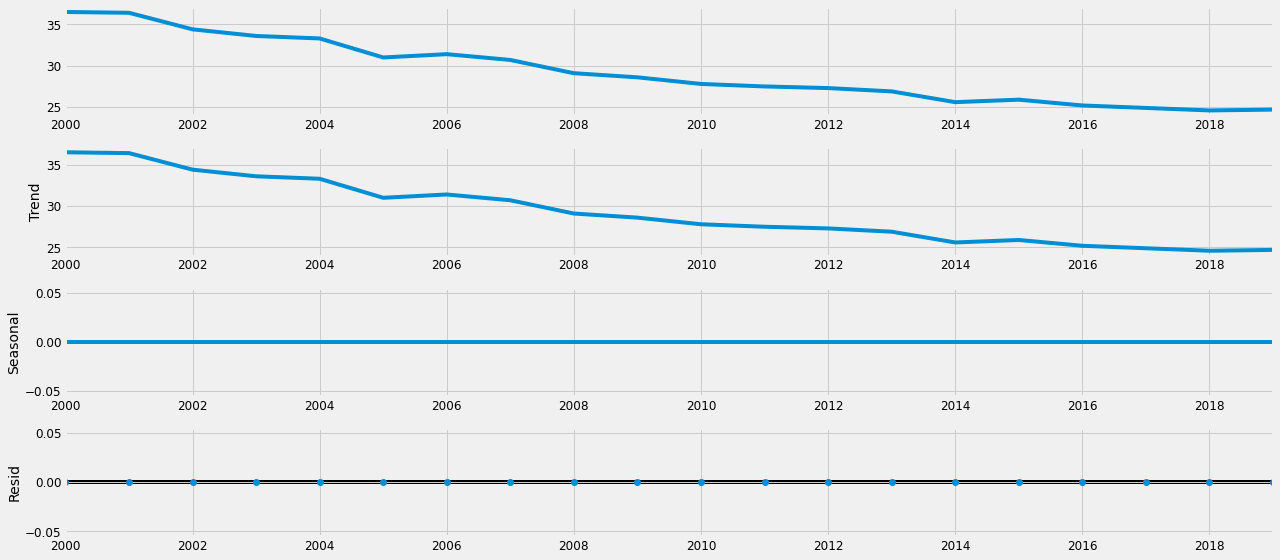

In [286]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [287]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [288]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:184.01416151534426
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:69.15280312719278
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:50.39161144561224
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23.127143893164092
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:22.94643132890617
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:176.02730907484747
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:61.95139776972798


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/vasko

ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:44.98790960404774
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:24.169419881060435


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:21.190400251969375
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:51.91475969134484
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15.677673683605718


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:19.94358892030798
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:14.017098942514714
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:15.008678174525176
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:46.59057821384178
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:10.67561698293571


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:19.139753936844343
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:11.60381304279899
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:9.111498283335322
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:43.210218288364125
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:15.533603766894412
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:22.042263060101394
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:14.920624378612349


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:16.920624312882392
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:39.588180085493775
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:13.525888500989012
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:15.389341777448298
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:13.06491310648157


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:13.3919143219114
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:52.634677247885264
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:17.643843323205605
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:20.934310065846503
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:9.913905770876188


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:11.913905774631946
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:38.94484989592495
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:12.21451107997013
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:20.417970845256384


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vasko

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:9.106062587281638


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-8.883042177113417
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [289]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3767         -0        inf      0.000      -0.377      -0.377
ma.L1         -0.2202         -0        inf      0.000      -0.220      -0.220
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.1360         -0       -inf      0.000       1.136       1.136


/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/vaskosimeunovic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


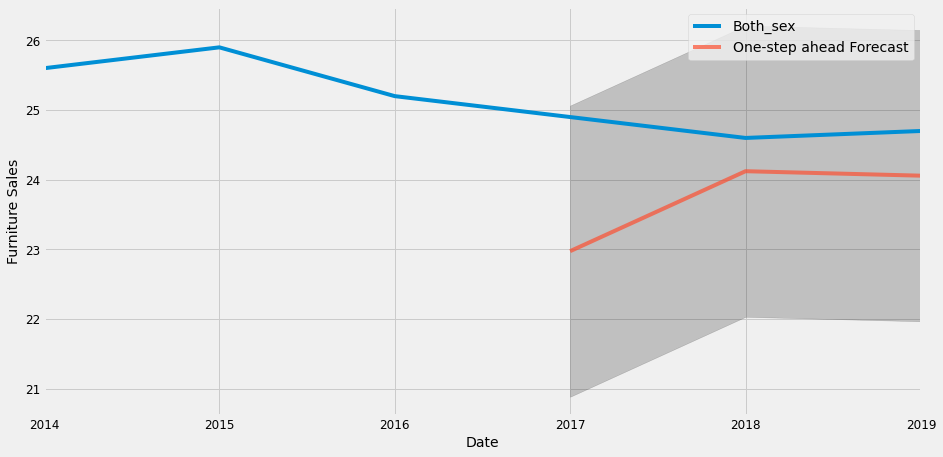

In [290]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

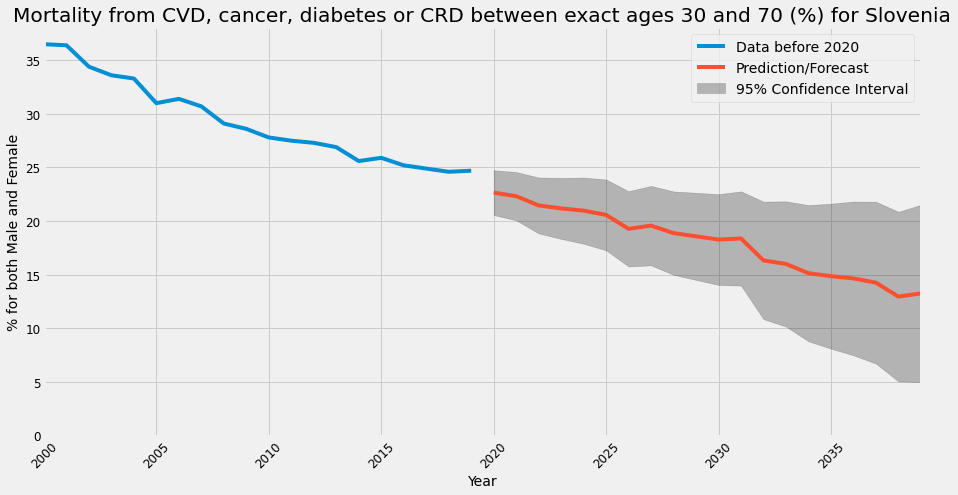

In [300]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title("Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%) for Slovenia")
ax.set_xlabel('Year')
ax.set_ylabel('% for both Male and Female')
plt.legend(['Data before 2020', 'Prediction/Forecast', "95% Confidence Interval"])
ax.set_ylim(ymin=0)
#ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=45)
plt.show()

In [292]:
results.forecast(steps=40)

2020-01-01    22.657367
2021-01-01    22.324120
2022-01-01    21.461299
2023-01-01    21.184966
2024-01-01    20.976050
2025-01-01    20.579409
2026-01-01    19.278143
2027-01-01    19.578620
2028-01-01    18.878440
2029-01-01    18.578508
2030-01-01    18.278483
2031-01-01    18.378492
2032-01-01    16.335856
2033-01-01    16.002610
2034-01-01    15.139789
2035-01-01    14.863455
2036-01-01    14.654539
2037-01-01    14.257898
2038-01-01    12.956633
2039-01-01    13.257110
2040-01-01    12.556930
2041-01-01    12.256998
2042-01-01    11.956972
2043-01-01    12.056982
2044-01-01    10.014345
2045-01-01     9.681099
2046-01-01     8.818278
2047-01-01     8.541945
2048-01-01     8.333029
2049-01-01     7.936388
2050-01-01     6.635122
2051-01-01     6.935599
2052-01-01     6.235419
2053-01-01     5.935487
2054-01-01     5.635462
2055-01-01     5.735471
2056-01-01     3.692835
2057-01-01     3.359589
2058-01-01     2.496768
2059-01-01     2.220434
Freq: AS-JAN, Name: predicted_mean, dtyp

In [ ]:
#Goal: By 2030 reduce premature mortality from non-communicable diseases (NCDs) by one-third in all countries.
#Results are in graph above. Slovenia will acomplish this goal - 2030 [18.278483%]